In [41]:
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [11]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [15]:
len(X_train)

60000

In [16]:
len(X_test)

10000

In [17]:
X_train[5].shape

(28, 28)

In [18]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

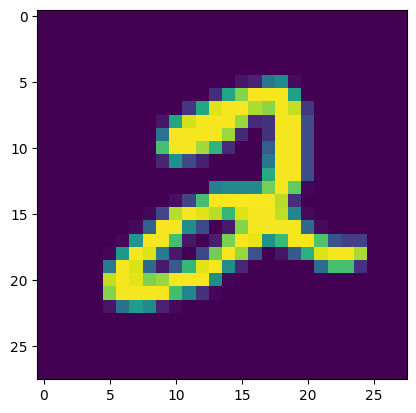

In [25]:
plt.imshow(X_train[5])

In [27]:
#Rescaling
X_train = X_train / 255
X_test = X_test / 255

In [28]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
#definig and compiling model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9392
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0852 - accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0570 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0434 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0319 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0266 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.014

In [40]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9797


[0.08717162907123566, 0.9797000288963318]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

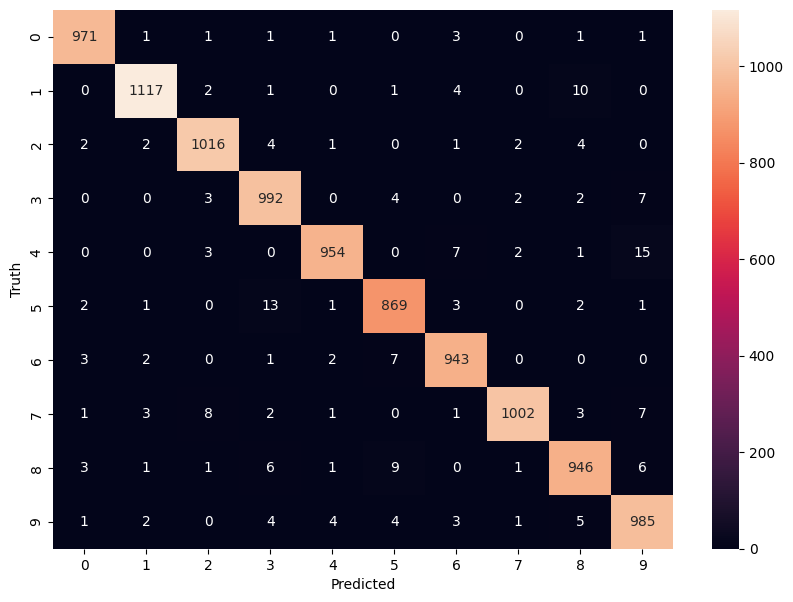

In [42]:

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')